## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

## loss

$$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$

$$ loss = \frac{1}{n} \sum \sqrt{(y_i - (kx_i + b_i))^2} $$

$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum\frac{-xi(yi-(kxi+bi))}{|yi-(kxi+bi)|}$$

$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum\frac{-xi(yi-\hat{y_i})}{|yi-\hat{y_i}|}$$


$$ \frac{\partial{loss}}{\partial{b}} = \frac{2}{n}\sum\frac{-(yi-\hat{y_i})}{|yi-\hat{y_i}|}$$

When time is : 0, get best_k: 1.1402043846812537 best_b: 1.0582866708509109, and the loss is: 14.359249417676429
When time is : 100, get best_k: 1.2007627668946823 best_b: 1.0486657222343123, and the loss is: 14.001782703514602
When time is : 200, get best_k: 1.260973783890724 best_b: 1.0391048526690938, and the loss is: 13.648407364053087
When time is : 300, get best_k: 1.3204346795429023 best_b: 1.0296748131433997, and the loss is: 13.30376333272522
When time is : 400, get best_k: 1.378591706420371 best_b: 1.0204684890327291, and the loss is: 12.974045273232445
When time is : 500, get best_k: 1.436142893376892 best_b: 1.0113692795465585, and the loss is: 12.651115973683009
When time is : 600, get best_k: 1.493585394957923 best_b: 1.0022890423924027, and the loss is: 12.329408041040958
When time is : 700, get best_k: 1.5506776004915166 best_b: 0.9932637459497146, and the loss is: 12.011608697282997
When time is : 800, get best_k: 1.6075274159065314 best_b: 0.9842779751987266, and the 

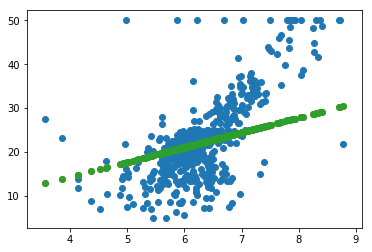

In [49]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random

data = load_boston()
X, y = data['data'], data['target']
X_rm = X[:, 5]

def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b


def loss(y, y_hat):  # to evaluate the performance
    return sum(abs(y_i - y_hat_i)for y_i,
               y_hat_i in zip(list(y), list(y_hat))) / len(list(y))


def partial_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (-x_i)*(y_i - y_hat_i) /(abs(y_i - y_hat_i))
    return 1 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) /(abs(y_i - y_hat_i))
    return 1 / n * gradient


trying_times = 20000
X, y = data['data'], data['target']
min_loss = float('inf')
current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100
learning_rate = 1e-04
update_time = 0
for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = loss(y, price_by_k_and_b)
    if current_loss < min_loss:  # performance became better
        min_loss = current_loss
        if i % 100 == 0:
            print(
                'When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(
                    i,
                    current_k,
                    current_b,
                    min_loss))
    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate
    
price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]
plt.scatter(X_rm, y)
plt.scatter(X_rm, price_by_random_k_and_b)
plt.scatter(X_rm, price_by_random_k_and_b)

### Part 3: Finish the Solution Parse Part of Edit-Distance

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

#### Ans: 保证拟合函数的方向是正确的（损失值一定比上次拟合的小）

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

####  Ans: 导数：损失函数的变化方向；下降：沿着损失函数变小的方向持续拟合



3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

#### Ans: 更快的得到最小损失，即相同的拟合次数，得到的拟合函数更好

4. Using the simple words to describe: What's the machine leanring.¶

#### Ans: 基于观测的值，进行归纳

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

#### ans： 

每个阶段只有一个状态->递推；

每个阶段的最优状态都是由上一个阶段的最优状态得到的->贪心；

***每个阶段的最优状态是由之前所有阶段的状态的组合得到的->搜索；***

***每个阶段的最优状态可以从之前某个阶段的某个或某些状态直接得到而不管之前这个状态是如何得到的->动态规划***


2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

#### ans : 机械学习不是万能的，在一定程度，动态规划比机械学习更简单

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

#### ans: 网络，路线，迷宫

4. Can you catch up at least 3 problems which could sloved by Edit Distance? 

#### ans：文本相似, 旅行路线最短和最划算，电线的铺设

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

#### ans: 

缓存: 对已经计算的结果进行保存

重叠子问题: 最终结果是由前一个结果得到的，只要计算前一个结果是如何得到的

记忆化:对于子问题的结果判断是否已经计算，如果在缓存计算了，直接查表就好，没有就例外计算


6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

#### ans :

本身却只蕴含了一个和暴力枚举差不多的基本算法；

尤其在决策空间维度很大时，动态规划算法会遭受著名的维数诅咒；

即算法求解时间随着问题规模指数级增长。

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

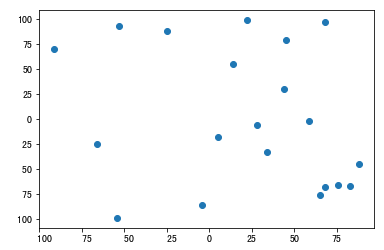

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

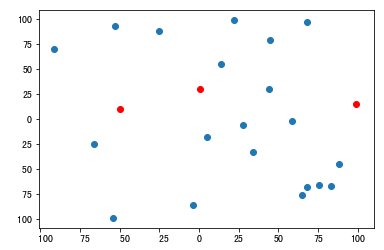

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro